In [1]:
import numpy as np
from keras.models import load_model
import cv2
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from time import sleep
import time
import matplotlib.pyplot as plt

2023-06-22 13:43:08.185172: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 13:43:08.237436: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 13:43:08.238203: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 13:43:09.515479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


1/1 [==============================] - 0s 196ms/step
Emocion: Neutral
1/1 [==============================] - 0s 22ms/step
Emocion: Neutral
1/1 [==============================] - 0s 22ms/step
Emocion: Neutral
1/1 [==============================] - 0s 20ms/step
Emocion: Neutral
1/1 [==============================] - 0s 21ms/step
Emocion: Neutral
1/1 [==============================] - 0s 21ms/step
Emocion: Neutral
1/1 [==============================] - 0s 22ms/step
Emocion: Neutral
1/1 [==============================] - 0s 22ms/step
Emocion: Neutral
1/1 [==============================] - 0s 21ms/step
Emocion: Neutral
1/1 [==============================] - 0s 20ms/step
Emocion: Fear
1/1 [==============================] - 0s 20ms/step
Emocion: Happy
1/1 [==============================] - 0s 20ms/step
Emocion: Happy
1/1 [==============================] - 0s 20ms/step
Emocion: Happy
1/1 [==============================] - 0s 21ms/step
Emocion: Happy
1/1 [==============================] - 0s 23

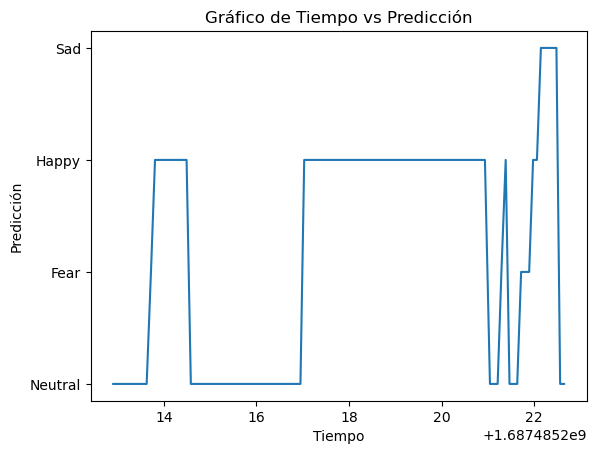

In [13]:
face_classifier = cv2.CascadeClassifier(r'haarcascade_frontalface_default.xml')
classifier =load_model(r'model.h5')

emotion_labels = ['Disgust', 'Angry', 'Fear', 'Sad', 'Neutral', 'Surprise', 'Happy']

cap = cv2.VideoCapture(0)

datatime = []
tiempo = 0

while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            tiempo = time.time()
            datatime.append(
                (tiempo,label)
            )
            print("Emocion:",label)
            label_position = (x,y-10)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

tiempos, predicciones = zip(*datatime)

#orden_predicciones = ['Disgust', 'Angry', 'Fear', 'Sad', 'Neutral', 'Surprise', 'Happy']
# Crear el gráfico de dispersión (predicción vs. tiempo)
plt.plot(tiempos, predicciones)
#plt.yticks(range(len(orden_predicciones)))
plt.xlabel('Tiempo')
plt.ylabel('Predicción')
plt.title('Gráfico de Tiempo vs Predicción')
plt.show()

cap.release()
cv2.destroyAllWindows()